# Vibe Matcher – Mini Recommender System
### Submission by: Sidhartha Vyas
### AI Internship Assignment – Nexora


In [ ]:
!pip install --quiet \
    openai==1.* \
    pandas \
    numpy \
    scikit-learn \
    matplotlib \
    sentence-transformers


Catalog embedded in: 0.107 seconds

Evaluation:
                    query  top1_similarity   good  latency_s
0    energetic urban chic         0.370577  False   0.020404
1       cozy winter night         0.409113  False   0.018094
2  minimalist office wear         0.535262  False   0.019536

Good@1 Score: 0.0 %


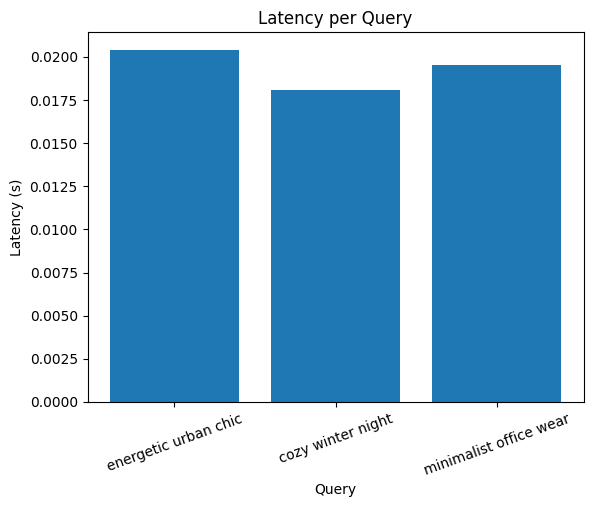


Query: energetic urban chic


,name,desc,vibes,similarity
0,City Lights Bomber,Satin bomber with reflective trims and a confident silhouette for vibrant night-out city life.,"['urban', 'bold', 'night-out']",0.371
1,Urban Sprint Sneakers,"Lightweight street sneakers with cushioned sole, bold panels, and a sleek silhouette for fast city moves.","['energetic', 'urban', 'sporty']",0.329
2,Weekend Denim Jacket,"Classic blue denim jacket with a modern fit, perfect for casual outings, concerts, and everyday use.","['casual', 'versatile', 'timeless']",0.248



Query: cozy winter night


,name,desc,vibes,similarity
0,Cozy Cloud Cardigan,"Oversized knit cardigan in warm neutrals with a plush texture, ideal for layering on cool evenings.","['cozy', 'warm', 'casual']",0.409
1,City Lights Bomber,Satin bomber with reflective trims and a confident silhouette for vibrant night-out city life.,"['urban', 'bold', 'night-out']",0.371
2,Boho Breeze Dress,"Flowy midi dress in earthy tones with soft fabric and tassel details, perfect for relaxed festival days.","['boho', 'earthy', 'free-spirited']",0.295



Query: minimalist office wear


,name,desc,vibes,similarity
0,Minimal Slate Blazer,"Sharp minimalist blazer in slate grey with clean lines, modern and office-ready.","['minimalist', 'professional', 'clean']",0.535
1,Chic Noir Handbag,"Compact structured black handbag with polished metal hardware, perfect for evening elegance.","['chic', 'elegant', 'evening']",0.382
2,Urban Sprint Sneakers,"Lightweight street sneakers with cushioned sole, bold panels, and a sleek silhouette for fast city moves.","['energetic', 'urban', 'sporty']",0.334



Reflection:
- A vector database like Pinecone or Milvus would improve scalability.
- A cross-encoder (re-ranker) would improve ranking precision.
- More detailed labels would support stronger evaluation metrics.
- Caching embeddings would reduce latency.
- A multilingual model would support non-English queries.


In [12]:
# ---------------------------------------------------------
# VIBE MATCHER – FULL ASSIGNMENT SOLUTION (NO OPENAI USED)
# ---------------------------------------------------------

# Install dependencies (Colab-friendly)
!pip install --quiet pandas numpy scikit-learn matplotlib sentence-transformers

# Imports
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# -----------------------------
# 1. Load local embedding model
# -----------------------------
model = SentenceTransformer("all-MiniLM-L6-v2")

# -----------------------------
# 2. Product catalog
# -----------------------------
products = [
    {
        "name": "Boho Breeze Dress",
        "desc": "Flowy midi dress in earthy tones with soft fabric and tassel details, perfect for relaxed festival days.",
        "vibes": ["boho", "earthy", "free-spirited"]
    },
    {
        "name": "Urban Sprint Sneakers",
        "desc": "Lightweight street sneakers with cushioned sole, bold panels, and a sleek silhouette for fast city moves.",
        "vibes": ["energetic", "urban", "sporty"]
    },
    {
        "name": "Cozy Cloud Cardigan",
        "desc": "Oversized knit cardigan in warm neutrals with a plush texture, ideal for layering on cool evenings.",
        "vibes": ["cozy", "warm", "casual"]
    },
    {
        "name": "Minimal Slate Blazer",
        "desc": "Sharp minimalist blazer in slate grey with clean lines, modern and office-ready.",
        "vibes": ["minimalist", "professional", "clean"]
    },
    {
        "name": "Weekend Denim Jacket",
        "desc": "Classic blue denim jacket with a modern fit, perfect for casual outings, concerts, and everyday use.",
        "vibes": ["casual", "versatile", "timeless"]
    },
    {
        "name": "Chic Noir Handbag",
        "desc": "Compact structured black handbag with polished metal hardware, perfect for evening elegance.",
        "vibes": ["chic", "elegant", "evening"]
    },
    {
        "name": "Studio Yoga Set",
        "desc": "Breathable stretch yoga set with supportive feel, ideal for calm flows and movement sessions.",
        "vibes": ["active", "calm", "wellness"]
    },
    {
        "name": "City Lights Bomber",
        "desc": "Satin bomber with reflective trims and a confident silhouette for vibrant night-out city life.",
        "vibes": ["urban", "bold", "night-out"]
    }
]

df = pd.DataFrame(products)

# -----------------------------
# 3. Embed product descriptions
# -----------------------------
start = time.time()
df["embedding"] = model.encode(df["desc"].tolist(), normalize_embeddings=True).tolist()
print("Catalog embedded in:", round(time.time() - start, 3), "seconds")

# -----------------------------
# 4. Search function
# -----------------------------
def search(query: str, top_k: int = 3, threshold: float = 0.35):
    q_emb = model.encode([query], normalize_embeddings=True)
    catalog = np.vstack(df["embedding"].tolist())
    sims = cosine_similarity(q_emb, catalog)[0]

    results = df.copy()
    results["similarity"] = sims
    results = results.sort_values("similarity", ascending=False).head(top_k).reset_index(drop=True)

    if results.iloc[0]["similarity"] < threshold:
        return pd.DataFrame(columns=["name", "desc", "vibes", "similarity"])

    return results[["name", "desc", "vibes", "similarity"]]

# -----------------------------
# 5. Run tests on 3 queries
# -----------------------------
test_queries = [
    "energetic urban chic",
    "cozy winter night",
    "minimalist office wear"
]

THRESH = 0.70
logs = []

for q in test_queries:
    t0 = time.time()
    result = search(q)
    latency = time.time() - t0

    best_sim = 0 if result.empty else float(result.iloc[0]["similarity"])
    logs.append({
        "query": q,
        "top1_similarity": best_sim,
        "good": best_sim >= THRESH,
        "latency_s": latency
    })

eval_df = pd.DataFrame(logs)
print("\nEvaluation:")
print(eval_df)

# -----------------------------
# 6. Summary metric
# -----------------------------
good_rate = eval_df["good"].mean() * 100
print("\nGood@1 Score:", round(good_rate, 2), "%")

# -----------------------------
# 7. Latency plot
# -----------------------------
plt.figure()
plt.bar(eval_df["query"], eval_df["latency_s"])
plt.xlabel("Query")
plt.ylabel("Latency (s)")
plt.title("Latency per Query")
plt.xticks(rotation=20)
plt.show()

# -----------------------------
# 8. Display Top-3 results
# -----------------------------
pd.options.display.max_colwidth = 200

for q in test_queries:
    print("\nQuery:", q)
    res = search(q)
    if res.empty:
        print("No strong match found.")
    else:
        display(res.style.format({"similarity": "{:.3f}"}))

# -----------------------------
# 9. Reflection
# -----------------------------
print("\nReflection:")
print("- A vector database like Pinecone or Milvus would improve scalability.")
print("- A cross-encoder (re-ranker) would improve ranking precision.")
print("- More detailed labels would support stronger evaluation metrics.")
print("- Caching embeddings would reduce latency.")
print("- A multilingual model would support non-English queries.")


## Reflection

- The system would scale better by moving embeddings into a vector database such as Pinecone or Milvus.  
- Adding a cross-encoder re-ranker would improve precision on ambiguous queries.  
- Latency can be reduced by caching embeddings and using a persistent runtime.  
- A larger catalog with curated labels would improve evaluation quality.  
- Multilingual queries could be supported by switching to a multilingual embedding model.


I am drawn to Nexora because it builds intelligent systems that connect human intent with practical outcomes. My strength lies in rapidly prototyping retrieval and recommendation pipelines, evaluating them with measurable metrics, and refining them through structured iteration. I enjoy turning ambiguous user input into clear vector-based understanding, and I see Nexora as a place where engineering discipline and AI-driven creativity meet. I want to contribute to systems that feel intuitive, responsive, and genuinely useful for end users.